## SVD Project

## This is a SVD recommendation project on Amazon Product Reviews
Electronic_Products User Ratings

Name of the dataset is ratings_Electronics (1).csv

## About Dataset

Online E-commerce websites like Amazon, Filpkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real time. This type of filtering matches each of the user's purchased and rated items to similar items, then combines those similar items into a recommendation list for the user. In this project we are going to build recommendation model for the electronics products of Amazon.

## Attribute Information:

● userId : Every user identified with a unique id (First Column)

● productId : Every product identified with a unique id(Second Column)

● Rating : Rating of the corresponding product by the corresponding user(Third Column)

● timestamp : Time of the rating ( Fourth Column)



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

Load the dataset

In [ ]:
user_rating_data = pd.read_csv('ratings_Electronics.csv')

In [ ]:
user_rating_data.columns = ['UserID','ProductID','Ratings','Timestamp']
user_rating_data.head()

,UserID,ProductID,Ratings,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
1,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
2,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
3,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09
4,A1QGNMC6O1VW39,0511189877,5.0,1.397434e+09


### Draw histogram to get idea how data is distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ebb94e410>,
      dtype=object)

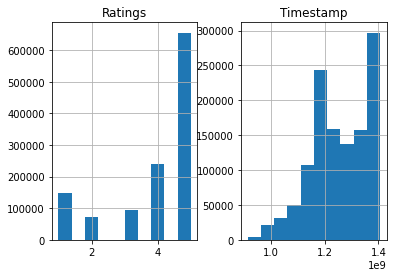

In [ ]:
user_rating_data.hist()

## Take subset of data

###Create a subset of data with users who has given ratings more than 50 times

In [ ]:
users_filter = user_rating_data['UserID'].value_counts()
usersfilter_df = pd.DataFrame(users_filter).reset_index()
usersfilter_df.columns = ['UserID','Count']
usersfilter_df_IDs = usersfilter_df[usersfilter_df['Count'] > 100]['UserID']
user_rating_data_Subset = user_rating_data[user_rating_data['UserID'].isin(usersfilter_df_IDs)]
user_rating_data_Subset

,UserID,ProductID,Ratings,Timestamp
2161,A5JLAU2ARJ0BO,1400532655,1.0,1.291334e+09
7788,A11D1KHM7DVOQK,B000001OMN,2.0,1.167350e+09
8731,A6FIAB28IS79,B00000J05A,3.0,9.855648e+08
10098,A11D1KHM7DVOQK,B00000J1G6,1.0,1.110499e+09
10721,AKT8TGIT6VVZ5,B00000J1TX,5.0,1.180224e+09
...,...,...,...,...
1201738,AKT8TGIT6VVZ5,B000ND75CU,5.0,1.366070e+09
1202082,A5JLAU2ARJ0BO,B000NDA4J6,1.0,1.244333e+09
1203082,A6FIAB28IS79,B000NDO744,3.0,1.188518e+09
1204487,A3OXHLG6DIBRW8,B000NF6ZK6,4.0,1.225152e+09


In [ ]:
user_rating_data_Subset.isna().sum()

UserID       0
ProductID    0
Ratings      0
Timestamp    0
dtype: int64

## Implmenting SVD algo

### Build train data and test data set

In [ ]:
! pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(user_rating_data_Subset[['UserID','ProductID','Ratings']],reader)
trainset,testset = train_test_split(data, test_size=.3)

In [ ]:
trainset_svd  = data.build_full_trainset()
len(trainset_svd.ur)

10

In [ ]:
from surprise import SVD

In [ ]:
algo_svd = SVD()
algo_svd.fit(trainset_svd)

### Prepare test data set

In [ ]:
testset_svd = trainset_svd.build_anti_testset()
len(testset_svd)

14468

In [ ]:
predictions_svd = algo_svd.test(testset_svd)
# predictions_svd

### Evaluate The Model

In [ ]:
from surprise import accuracy

In [ ]:
print("User-based Model : Test Set")
accuracy.rmse(predictions_svd, verbose=True)

User-based Model : Test Set
RMSE: 0.5602


0.5601676958566455

In [ ]:
from collections import defaultdict

In [ ]:
top_n = defaultdict(list)
for uid, iid, true_r, est, _ in predictions_svd:
        top_n[uid].append((iid,true_r,est,_))

### Get top 10 results for recommendations

In [ ]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_n(predictions_svd, n=5)

In [ ]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A5JLAU2ARJ0BO ['B00021UJ30', 'B00004Z0C2', 'B00014K3VG', 'B0002RX1WA', 'B0000AKVHF']
A11D1KHM7DVOQK ['B000083J0D', 'B0000645ED', 'B00008VFCT', 'B00008IP5N', 'B000FRL5ES']
A6FIAB28IS79 ['B00006RYUX', 'B00028VKO0', 'B00005NKXS', 'B0000520I7', 'B00006IR39']
AKT8TGIT6VVZ5 ['B00004ZCJE', 'B00005ATXJ', 'B00005O0LI', 'B00005T3SM', 'B00005V54U']
A231WM2Z2JL0U3 ['B0006BCCPO', 'B00006LFI5', 'B0000E1717', 'B00006JQ3D', 'B0009FUFPG']
A2B7BUH8834Y6M ['B000060OEO', 'B0009E5YNA', 'B00008IP4V', 'B000HZD2XK', 'B000IALP88']
A3OXHLG6DIBRW8 ['B00006JQQ6', 'B000FTEG24', 'B0001LD00A', 'B0009FUFPG', 'B00078NIOA']
A203OCQQ12MAVT ['B00006OX9D', 'B00004TS16', 'B00009K7ES', 'B00014M3ZK', 'B00004ZB57']
AT6CZDCP4TRGA ['B00005BABT', 'B000087KY5', 'B00006B7WN', 'B00003006R', 'B00009MDBY']
A25HBO5V8S8SEA ['B000001OMN', 'B00000J1TX', 'B00000J1US', 'B00000J9Z7', 'B00000JCTD']


In [ ]:
# predict for sample user
pred = algo_svd.predict('A1V3TRGWOMA8LC','B003ES5ZUU',verbose=True)

user: A1V3TRGWOMA8LC item: B003ES5ZUU r_ui = None   est = 4.15   {'was_impossible': False}


# Summary:


1. Product B0088CJT4U is the most popular one to recommend to a new user (among subset of data where users who has given ratings more than 100 times**)
2. KNNwith means algorithm can not be used as our data set doesn't have users which are very similar to each other
3. Using SVD algorithm we can say that model getting accuracy of RMSE 0.38 (considering the subset taken as users with more than 100 ratings)
4. For user A1V3TRGWOMA8LC and product B003ES5ZUU is most recommended one

### Reference

[Surprise Package](https://surprise.readthedocs.io/en/stable/FAQ.html)

[dataset](https://surprise.readthedocs.io/en/stable/dataset.html)

[reader](https://surprise.readthedocs.io/en/stable/reader.html)

[train and test](https://surprise.readthedocs.io/en/stable/model_selection.html)

[test](https://surprise.readthedocs.io/en/stable/trainset.html)

[default dict](https://docs.python.org/3/library/collections.html#collections.defaultdict)
